In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import warnings
import lxml
import html5lib
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: title={'center': 'Ticker: ES=F'}, xlabel='Date'>

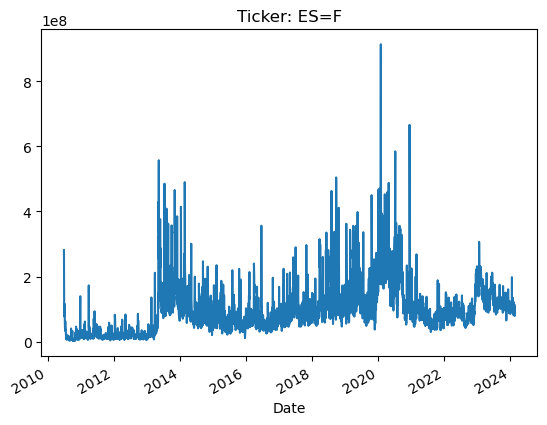

In [9]:
df = yf.Ticker("TSLA").history(period='max')['Volume']
df.plot(title="Ticker: ES=F")

In [10]:
Tesla = yf.Ticker('TSLA')
tesla_data = Tesla.history()
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-29 00:00:00-05:00,185.630005,191.479996,183.669998,190.929993,125013100,0,0
1,2024-01-30 00:00:00-05:00,195.330002,196.360001,190.610001,191.589996,109982300,0,0
2,2024-01-31 00:00:00-05:00,187.000000,193.970001,185.850006,187.289993,103221400,0,0
3,2024-02-01 00:00:00-05:00,188.500000,189.880005,184.279999,188.860001,91843300,0,0
4,2024-02-02 00:00:00-05:00,185.039993,188.690002,182.000000,187.910004,110505100,0,0


In [11]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "lxml")
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
    tesla_revenue.tail()

In [12]:
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period='25y')
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Text(0.5, 1.0, 'Volume of company over years')

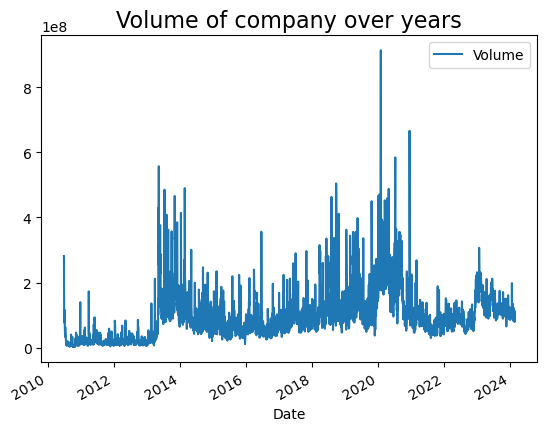

In [13]:
df = yf.Ticker("TSLA").history(period='20y')
df.plot(y='Volume')
plt.title("Volume of company over years", fontsize=16)

Text(0.5, 1.0, 'GameStock volume over years')

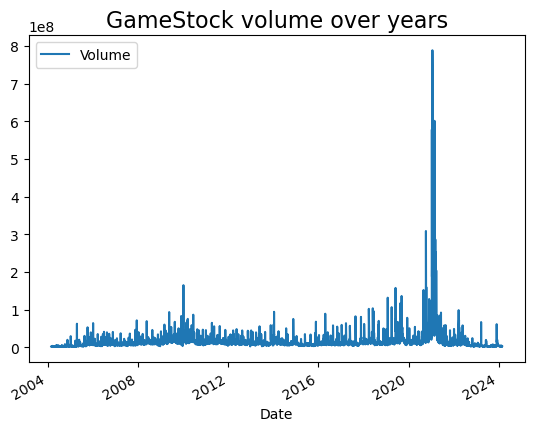

In [14]:
df2 = yf.Ticker('GME').history(period='20y')
df2.plot(y='Volume')
plt.title('GameStock volume over years', fontsize=16)